_ATU Donegal - MSc in Data Science: Machine Learning_
**<h1>Lab 4: Decision Trees and Random Forests</h1>**

In this lab we'll look at constructing decision trees on several datasets. First we'll load some recruitment data on past hires. We load the CSV file using Pandas and convert it into a DataFrame.

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

!wget https://raw.githubusercontent.com/paulgreaney/data/main/PastHires.csv
df = pd.read_csv('PastHires.csv', header = 0)

--2024-02-16 14:47:19--  https://raw.githubusercontent.com/paulgreaney/data/main/PastHires.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 312 [text/plain]
Saving to: ‘PastHires.csv’

PastHires.csv       100%[===================>]     312  --.-KB/s    in 0s      

2024-02-16 14:47:19 (16.6 MB/s) - ‘PastHires.csv’ saved [312/312]



In [2]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


Scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using `map()`, we know we'll get `NaN` for unexpected values.

In [3]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Next we need to separate the features from the target column for which we're trying to build a decision tree.

In [4]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Now actually construct the decision tree:

In [5]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

... and display it. Note you need to have pyplot2 installed for this to work.

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So `value = [0 5]` mean there are 0 "no hires" and 5 "hires" by the time we get to that point, and `value = [3 0]` means 3 no-hires and 0 hires.

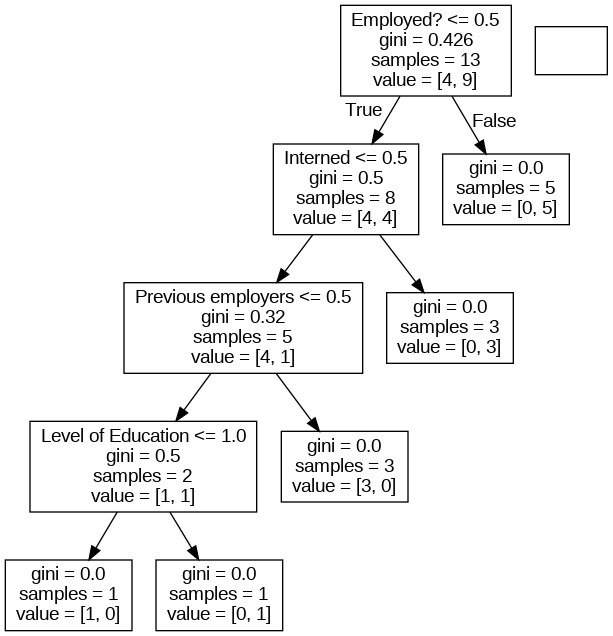

In [6]:
from IPython.display import Image
from six import StringIO
import pydot

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

## Ensemble Learning: Using a Random Forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)
print(clf.predict([[10, 1, 4, 0, 0, 0]]))
print(clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


How does this compare to the single decision tree model?

Let's create another random forest model for the Iris dataset and compare it with a single decision tree model. The helper function `plot_decision_regions` is from _Python Machine Learning_ by Raschka & Mirjalili.

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, labels=[],
                          test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', '^', 'o', 'x', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=labels[cl],
                    edgecolor='black')
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='None', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')

First, the decision tree:

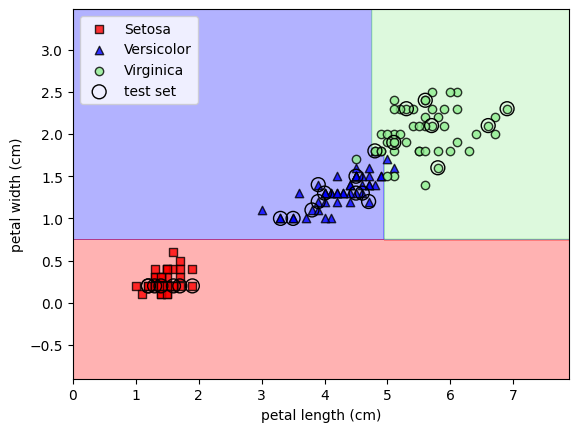

In [9]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
class_names = ['Setosa','Versicolor','Virginica']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree,
                      labels=class_names, test_idx=range(0, 25))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.show()

Then the random forest:

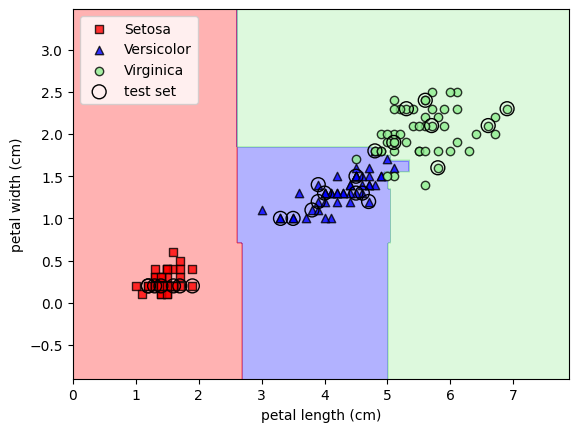

In [10]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True,
                           rounded=True,
                           class_names=class_names,
                           feature_names=['petal length', 'petal width'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, labels=class_names,
                      test_idx=range(0, 25))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc='upper left')
plt.show()

## Exercises

#### 1.Obtain a measure of the accuracy of the decision tree and random forest models on the Iris dataset by adding the required code to the two code blocks.

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()


In [37]:
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])
iris_df['Iris_type'] = iris_data['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
# iris_df['Iris_type'].unique()
# x_iris = iris_df.drop('Iris_type',axis=1)
# y_iris = iris_df['Iris_type']
x_iris=iris.data
y_iris=iris.target

X_train,X_test,y_train,y_testt = train_test_split(x_iris,y_iris,test_size=0.2,random_state=32)

In [44]:
rf = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)

dt = DecisionTreeClassifier(max_depth=5, criterion="entropy")

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)


dt_accuracy = accuracy_score(y_test,y_pred_dt)
dt_accuracy_train = accuracy_score(y_train,y_pred_dt_train)


print(f"Decision Tree accuracy = {dt_accuracy}")
print(f"Decision Tree Train accuracy = {dt_accuracy_train}")



Decision Tree accuracy = 1.0
Decision Tree Train accuracy = 1.0


#### 2.By following the code above, use the `restaurants.csv` file to build a decision tree for the restaurant waiting example. You will
need to add further dictionaries to map the variables to index values.*

In [16]:
!wget https://raw.githubusercontent.com/paulgreaney/data/main/restaurant.csv

# your code here
rest_df = pd.read_csv('restaurant.csv', header = 0)
rest_df.head()

--2024-02-16 14:47:35--  https://raw.githubusercontent.com/paulgreaney/data/main/restaurant.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572 [text/plain]
Saving to: ‘restaurant.csv’

restaurant.csv      100%[===================>]     572  --.-KB/s    in 0s      

2024-02-16 14:47:35 (28.7 MB/s) - ‘restaurant.csv’ saved [572/572]



,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Wait
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [17]:
# rest_df['Pat'].unique()
# rest_df['Type'].unique()
rest_df['Est'].unique()



array(['0-10', '30-60', '10-30', '>60'], dtype=object)

In [18]:
d = {'Yes': 1, 'No': 0}
rest_df['Alt'] = rest_df['Alt'].map(d)
rest_df['Bar'] = rest_df['Bar'].map(d)
rest_df['Fri'] = rest_df['Fri'].map(d)
rest_df['Hun'] = rest_df['Hun'].map(d)
rest_df['Rain'] = rest_df['Rain'].map(d)
rest_df['Res'] = rest_df['Res'].map(d)
rest_df['Wait'] = rest_df['Wait'].map(d)


pat_d = {'Some': 0, 'Full': 1, 'None': 2}
rest_df['Pat'] = rest_df['Pat'].map(pat_d)

type_d = {'French': 0, 'Thai': 1, 'Burger': 2, 'Italian': 3}
rest_df['Type'] = rest_df['Type'].map(type_d)

price_d = {'$$$': 3, '$$': 2, '$': 1}
rest_df['Price'] = rest_df['Price'].map(price_d)

est_d = {'0-10':1, '10-30':2 , '30-60':3 , '>60':4}
rest_df['Est'] = rest_df['Est'].map(est_d)
rest_df.head()

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Wait
0,1,0,0,1,0,3,0,1,0,1,1
1,1,0,0,1,1,1,0,0,1,3,0
2,0,1,0,0,0,1,0,0,2,1,1
3,1,0,1,1,1,1,0,0,1,2,1
4,1,0,1,0,1,3,0,1,0,4,0


In [34]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
## Split X and Y

x = rest_df.drop('Wait', axis=1)
y = rest_df['Wait']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# variables for models


decision_tree = DecisionTreeClassifier(max_depth=5, criterion="entropy")

decision_tree.fit(X_train,y_train)

y_pred_dt = decision_tree.predict(X_test)

dt_accuracy = accuracy_score(y_test,y_pred_dt)

print(f"Decision Tree accuracy = {dt_accuracy}")



Decision Tree accuracy = 0.75


In [20]:
rest_df.head()

,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Wait
0,1,0,0,1,0,3,0,1,0,1,1
1,1,0,0,1,1,1,0,0,1,3,0
2,0,1,0,0,0,1,0,0,2,1,1
3,1,0,1,1,1,1,0,0,1,2,1
4,1,0,1,0,1,3,0,1,0,4,0


In [21]:
features = list(rest_df.columns[:-1])
features

['Alt', 'Bar', 'Fri', 'Hun', 'Pat', 'Price', 'Rain', 'Res', 'Type', 'Est']

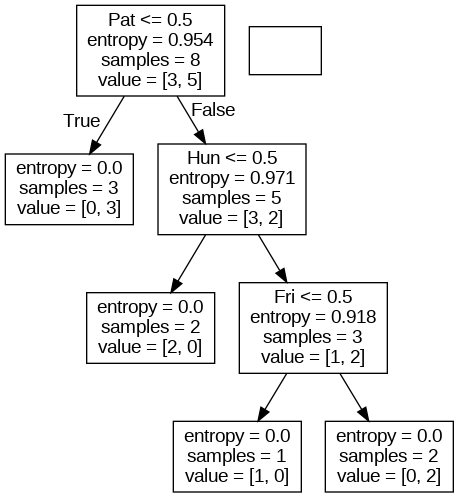

In [22]:
# Build a decision tree
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(decision_tree, out_file=dot_data,
                         feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

####3.Create a random forest model for the restaurant waiting example, and compare its performance with the single decision tree using the accuracy metric.*

In [35]:
random_forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=7,
                                random_state=9)


# The Accuracy is less with 1 tree
# random_forest = RandomForestClassifier(criterion='entropy',
#                                 n_estimators=1,
#                                 random_state=9)

random_forest.fit(X_train,y_train)

y_pred_rf = random_forest.predict(X_test)

rf_accuracy = accuracy_score(y_test,y_pred_rf)

print(f"Random Forest accuracy = {rf_accuracy}")
print(f"Decision Tree accuracy = {dt_accuracy}")


Random Forest accuracy = 0.75
Decision Tree accuracy = 0.75


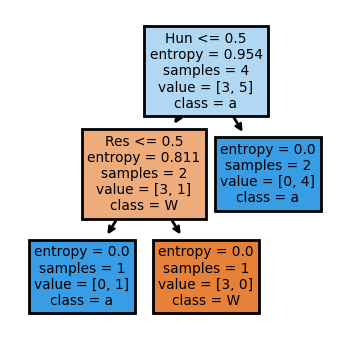

In [24]:
from sklearn import tree

# dot_data = StringIO()
# tree.export_graphviz(random_forest, out_file=dot_data,
#                          feature_names=features)
# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

# Image(graph.create_png())



fn=rest_df.drop('Wait', axis=1).columns
cn='Wait'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=200)
tree.plot_tree(random_forest.estimators_[1],
               feature_names = fn,
               class_names=cn,
               filled = True);

#### 4.Create decision tree and random forest models for the cancer cell dataset we used in Lab 3, and compare their accuracy with each other and with the SVM model we created previously for this dataset.*

In [25]:
!wget -O cell_samples.csv https://raw.githubusercontent.com/paulgreaney/data/main/cell_samples.csv


--2024-02-16 14:47:39--  https://raw.githubusercontent.com/paulgreaney/data/main/cell_samples.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/plain]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  --.-KB/s    in 0.001s  

2024-02-16 14:47:39 (37.0 MB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [26]:
cell_df = pd.read_csv('cell_samples.csv')

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.info()
feature_data = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x = np.asarray(feature_data)
y = np.asarray(cell_df['Class'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [27]:

x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=32)

# variables for models


decision_tree = DecisionTreeClassifier(max_depth=5, criterion="entropy")

random_forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=7,
                                random_state=9)

decision_tree.fit(x_train,y_train)
random_forest.fit(x_train,y_train)


y_pred_dt = decision_tree.predict(x_test)
y_pred_rf = random_forest.predict(x_test)


dt_accuracy = accuracy_score(y_test,y_pred_dt)
rf_accuracy = accuracy_score(y_test,y_pred_rf)


print(f"Decision Tree accuracy = {dt_accuracy}")
print(f"Random Forest accuracy = {rf_accuracy}")


Decision Tree accuracy = 0.9414634146341463
Random Forest accuracy = 0.975609756097561


In [28]:
from sklearn import svm

svc_model_final = svm.SVC(kernel='rbf', C=11.6)

svc_model_final.fit(x_train,y_train)
y_pred = svc_model_final.predict(x_test)

print(f"Accuracy = {accuracy_score(y_test,y_pred)}")

Accuracy = 0.9658536585365853


#### 5.Finally, try out XGBoost with this dataset to see how it compares. How many estimators are needed for a good result?

In [29]:
from xgboost import XGBClassifier

## xgboost expects 0 and 1 as class labels
y_train[y_train == 2], y_train[y_train == 4] = 0, 1
y_test[y_test == 2], y_test[y_test == 4] = 0, 1

# create and fit the model

# evaluate the model

In [47]:
model = XGBClassifier()
model_est = XGBClassifier(n_estimators=26) # With 56 estimators the model is performing well.

model.fit(x_train, y_train)
model_est.fit(x_train, y_train)

y_pred_xg = model.predict(x_test)
y_pred_xg_esti = model_est.predict(x_test)

print(f"Without Estimators Accuracy = {accuracy_score(y_test,y_pred_xg)}")
print(f"Estimators Accuracy = {accuracy_score(y_test,y_pred_xg_esti)}")



Without Estimators Accuracy = 0.9666666666666667
Estimators Accuracy = 0.9666666666666667


### Assessment
To get the marks for this lab, explain your solution to exercises 2, 3 and 4 to the lecturer.